# Plume Feedback Test

In [74]:
%matplotlib inline
from IPython.display import display, Markdown
import fnmatch
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import datetime as dt 
import scipy.signal
import matplotlib.ticker as mticker
import math
from IPython.display import display, Latex
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 12.
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 16

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

In [75]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
overshootData = pd.read_csv(save_path+'overshoot_data.csv')
plumeData = pd.read_csv(save_path+'single_plume_data_overshoot.csv')
plumeDataMid = pd.read_csv(save_path+'single_plume_data_overshoot_mid_depth.csv')

plumeData['Difference'] = overshootData['Difference']
plumeData['ThicknessMid'] = plumeDataMid['Thickness']
plumeData['Z Speed Mid'] = plumeDataMid['Z Speed']
plumeData.drop(plumeData.tail(2).index,inplace = True)
# plumeData = plumeData[plumeData['Ra'] != 3e8]; 
plumeData

,Ra,Number,Mean T,STDEV,Max T,Min T,Speed,Z Speed,Thickness,Difference,ThicknessMid,Z Speed Mid
0,1.000000e+04,2,0.657254,0.000493,0.657747,0.656761,1.787829e+03,36.261476,0.165158,0.011773,0.095119,56.800699
1,1.000000e+05,2,0.671318,0.000797,0.672115,0.670521,3.524553e+04,127.472093,0.093847,0.018740,0.027018,416.148162
2,1.000000e+06,2,0.680358,0.001070,0.681428,0.679289,6.251093e+05,335.220581,0.063703,0.021892,0.009410,2302.364167
3,3.000000e+06,1,0.592889,0.000000,0.592889,0.592889,3.099585e+06,108.864865,0.402762,0.041393,0.031007,3360.990820
4,1.000000e+07,1,0.632485,0.000000,0.632485,0.632485,5.920516e+06,1630.400623,0.091856,0.041945,0.019213,7676.319779
5,3.000000e+07,1,0.605759,0.000000,0.605759,0.605759,5.360160e+07,262.995487,0.346137,0.039053,0.006215,13570.868852
6,1.000000e+08,7,0.613222,0.020887,0.655847,0.593253,3.506096e+07,668.940143,0.009813,0.028733,0.003119,42623.000000
7,3.000000e+08,2,0.636616,0.000253,0.636869,0.636363,8.903071e+08,1329.368527,0.117534,0.032673,0.001100,59069.846154
8,6.000000e+08,8,0.613626,0.019002,0.651158,0.589815,2.845570e+07,178.226278,0.026698,0.024253,0.000757,64447.875000
9,1.000000e+09,15,0.579263,0.021396,0.629022,0.558975,1.638136e+07,173.166500,0.001394,0.022406,0.000539,47685.222222


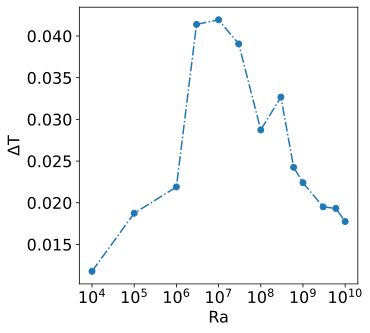

In [76]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log');
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('ΔT');
plt.xticks(np.logspace(4,10,num=7));

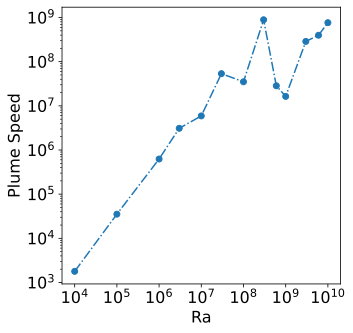

In [77]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Speed'],'.',linestyle='-.')
plt.xscale('log'); plt.yscale('log')
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Plume Speed');
plt.xticks(np.logspace(4,10,num=7));

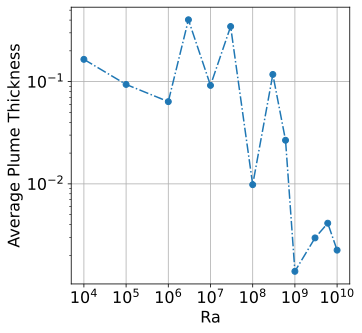

In [78]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Thickness'],'.',linestyle='-.')
plt.xscale('log'); 
plt.yscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Average Plume Thickness');
plt.grid()
plt.xticks(np.logspace(4,10,num=7));

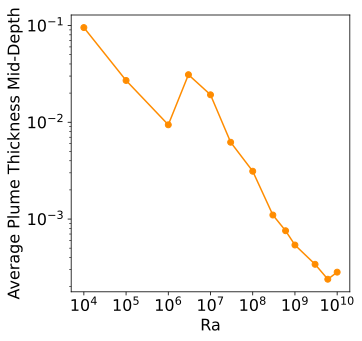

In [79]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['ThicknessMid'],'.',linestyle='-',color='darkorange')
plt.xscale('log'); 
plt.yscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Average Plume Thickness Mid-Depth');
plt.xticks(np.logspace(4,10,num=7));
plt.savefig(image_path + 'thickness vs ra.png',pad_inches=0.1,bbox_inches='tight');

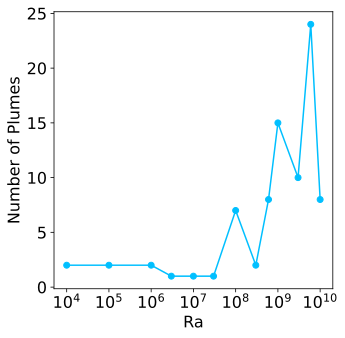

In [80]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Number'],'.',linestyle='-',color='deepskyblue')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Number of Plumes');
plt.xticks(np.logspace(4,10,num=7));
plt.savefig(image_path + 'number vs ra.png',pad_inches=0.1,bbox_inches='tight');

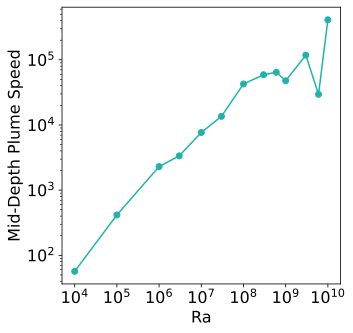

In [81]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Z Speed Mid'],'.',linestyle='-', color='lightseagreen')
plt.xscale('log'); plt.yscale('log')
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Mid-Depth Plume Speed');
# plt.grid()
plt.xticks(np.logspace(4,10,num=7));
plt.savefig(image_path + 'speed vs Ra.png',pad_inches=0.1,bbox_inches='tight');

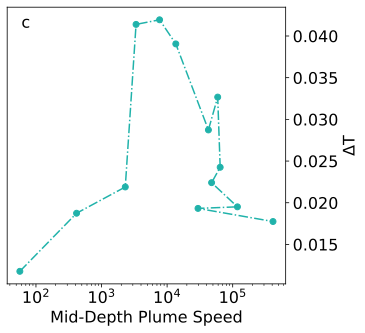

In [82]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.', color='lightseagreen')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Mid-Depth Plume Speed')
plt.ylabel('ΔT');
plt.text(6e1,0.041,'c')
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.set_ylabel('ΔT', rotation=0)
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'overshoot_vs_z_speed_mid.png',pad_inches=0.1,bbox_inches='tight');

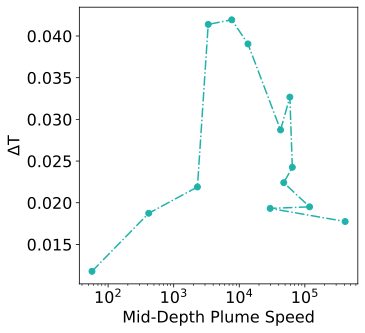

In [83]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.', color='lightseagreen')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Mid-Depth Plume Speed')
plt.ylabel('ΔT');

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'overshoot_vs_z_speed_mid normal axis.png',pad_inches=0.1,bbox_inches='tight');

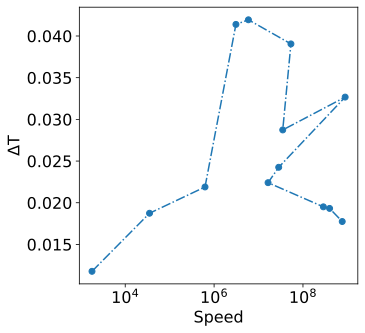

In [84]:
plt.rcParams['figure.figsize'] = [5,5]
plt.plot(plumeData['Speed'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Speed')
plt.ylabel('ΔT');
plt.savefig(image_path + 'overshoot_vs_speed.png',pad_inches=0.1,bbox_inches='tight');

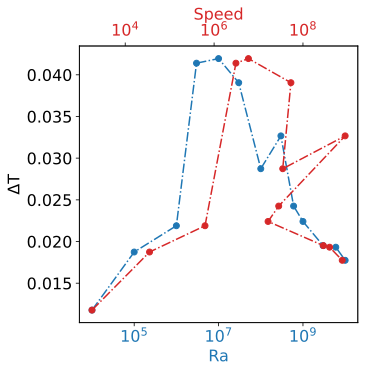

In [85]:
fig, ax1 = plt.subplots(figsize=(5,5))
plt.xscale('log'); 
plt.xlabel('Ra')
plt.ylabel('ΔT')
# plt.xticks(np.logspace(4,10,num=7));
color = 'tab:blue'
ax1.set_xlabel('Ra', color=color);
ax1.tick_params(axis='x', labelcolor=color);
ax2 = ax1.twiny()  
ax1.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
color = 'tab:red'
ax2.plot(plumeData['Speed'],plumeData['Difference'],'.',linestyle='-.', color=color)
plt.xscale('log');
# plt.xticks(np.logspace(4,10,num=7));
ax2.set_xlabel('Speed', color=color);
ax2.tick_params(axis='x', labelcolor=color);

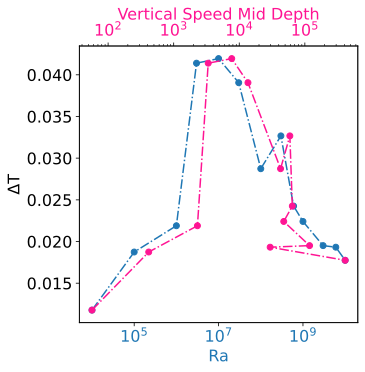

In [86]:
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.xscale('log'); 
plt.xlabel('Ra')
plt.ylabel('ΔT')
# plt.xticks(np.logspace(4,10,num=7));
color = 'tab:blue'
ax1.set_xlabel('Ra', color=color);
ax1.tick_params(axis='x', labelcolor=color);
ax2 = ax1.twiny()  
ax1.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
color = 'deeppink'
ax2.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.', color=color)
plt.xscale('log');
# plt.xticks(np.logspace(2,6,num=4));
ax2.set_xlabel('Vertical Speed Mid Depth', color=color);
ax2.tick_params(axis='x', labelcolor=color);

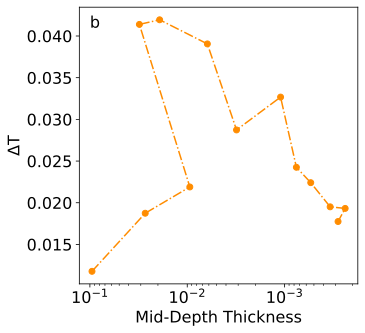

In [87]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['ThicknessMid'],plumeData['Difference'],'.',linestyle='-.', color='darkorange')
plt.xscale('log'); 
plt.xlabel('Mid-Depth Thickness')
plt.ylabel('ΔT');
plt.text(1e-1,0.041,'b')
plt.gca().invert_xaxis()
plt.savefig(image_path + 'overshoot_vs_thickness.png',pad_inches=0.1,bbox_inches='tight');